In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

In [2]:
class Model_define:
    nn_clf = KNeighborsClassifier(n_neighbors=3)
    dt_clf =DecisionTreeClassifier()
    rf_clf = RandomForestClassifier()
    ad_clf =AdaBoostClassifier()
    net_clf = MLPClassifier()
    nb_clf = GaussianNB()
    qda_clf = QuadraticDiscriminantAnalysis()

    def __init__(self, beer_model):
        self.beer_input = beer_model.drop(["Style Key"], axis=1)
        self.beer_target = beer_model["Style Key"]
        self.train_input, self.test_input, self.train_target, self.test_target = \
            train_test_split(self.beer_input, self.beer_target, test_size=0.3)
        # self.train_input, self.val_input, self.train_target, self.val_target = \
        #     train_test_split(self.train_input, self.train_target, test_size=0.3)
    
    def model_score(self, model):
        model.fit(self.train_input, self.train_target)
        print("train_score :", model.score(self.train_input, self.train_target))
        print("val_score :", model.score(self.test_input, self.test_target))

    def pscore(self):
        print("KNN\n-----------------------------------------------")
        self.model_score(self.nn_clf)
        print("Decision Tree\n-----------------------------------------------")
        self.model_score(self.dt_clf)
        print("Random Forest\n-----------------------------------------------")
        self.model_score(self.rf_clf)
        print("AdaBoost\n-----------------------------------------------")
        self.model_score(self.ad_clf)
        print("Neural Net\n-----------------------------------------------")
        self.model_score(self.net_clf)
        print("Naive bayes\n-----------------------------------------------")
        self.model_score(self.nb_clf)
        print("QDA\n-----------------------------------------------")
        self.model_score(self.qda_clf)


In [3]:
beer = pd.read_csv("./Data/beer_data_set.csv")
beer.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


In [4]:
b_style = beer.Style.unique()
len(b_style)

112

In [5]:
new_b_style = []
for i in range(len(b_style)):
    new_b_style.append(b_style[i].split("-")[0].strip())
new_b_style

['Altbier',
 'Barleywine',
 'Barleywine',
 'Bitter',
 'Bitter',
 'Bière de Champagne / Bière Brut',
 'Blonde Ale',
 'Blonde Ale',
 'Bock',
 'Bock',
 'Bock',
 'Bock',
 'Bock',
 'Braggot',
 'Brett Beer',
 'Brown Ale',
 'Brown Ale',
 'Brown Ale',
 'California Common / Steam Beer',
 'Chile Beer',
 'Cream Ale',
 'Dubbel',
 'Farmhouse Ale',
 'Farmhouse Ale',
 'Farmhouse Ale',
 'Fruit and Field Beer',
 'Gruit / Ancient Herbed Ale',
 'Happoshu',
 'Herb and Spice Beer',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'Kvass',
 'Kölsch',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lambic',
 'Lambic',
 'Lambic',
 'Lambic',
 'Low Alcohol Beer',
 'Mild Ale',
 'Mild Ale',
 'Old Ale',
 'Pale Ale',
 'Pale Ale',
 'Pale Ale',
 'Pilsner',
 'Pilsner',
 'Pilsner',
 'Porter',
 'Porter',
 'Porter',
 'Porter',
 'Porter',
 'Porter',
 'Pumpkin Beer',
 'Quadrupel (Qua

In [6]:
(np.unique(new_b_style, return_counts=True))

(array(['Altbier', 'Barleywine', 'Bitter',
        'Bière de Champagne / Bière Brut', 'Blonde Ale', 'Bock', 'Braggot',
        'Brett Beer', 'Brown Ale', 'California Common / Steam Beer',
        'Chile Beer', 'Cream Ale', 'Dubbel', 'Farmhouse Ale',
        'Fruit and Field Beer', 'Gruit / Ancient Herbed Ale', 'Happoshu',
        'Herb and Spice Beer', 'IPA', 'Kvass', 'Kölsch', 'Lager', 'Lambic',
        'Low Alcohol Beer', 'Mild Ale', 'Old Ale', 'Pale Ale', 'Pilsner',
        'Porter', 'Pumpkin Beer', 'Quadrupel (Quad)', 'Red Ale',
        'Rye Beer', 'Scotch Ale / Wee Heavy', 'Scottish Ale',
        'Smoked Beer', 'Sour', 'Stout', 'Strong Ale', 'Tripel',
        'Wheat Beer', 'Wild Ale', 'Winter Warmer'], dtype='<U31'),
 array([ 1,  2,  2,  1,  2,  5,  1,  1,  3,  1,  1,  1,  1,  3,  1,  1,  1,
         1,  7,  1,  1, 18,  4,  1,  2,  1,  3,  3,  6,  1,  1,  3,  2,  1,
         1,  1,  4,  8,  4,  1,  7,  1,  1], dtype=int64))

In [7]:
ales = []
for i in range(len(new_b_style)):
    for j in new_b_style[i].split():
        if j == "Ale":
            # ales.append(new_b_style[i])
            new_b_style[i] = "Ale"
new_b_style

['Altbier',
 'Barleywine',
 'Barleywine',
 'Bitter',
 'Bitter',
 'Bière de Champagne / Bière Brut',
 'Ale',
 'Ale',
 'Bock',
 'Bock',
 'Bock',
 'Bock',
 'Bock',
 'Braggot',
 'Brett Beer',
 'Ale',
 'Ale',
 'Ale',
 'California Common / Steam Beer',
 'Chile Beer',
 'Ale',
 'Dubbel',
 'Ale',
 'Ale',
 'Ale',
 'Fruit and Field Beer',
 'Ale',
 'Happoshu',
 'Herb and Spice Beer',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'IPA',
 'Kvass',
 'Kölsch',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lager',
 'Lambic',
 'Lambic',
 'Lambic',
 'Lambic',
 'Low Alcohol Beer',
 'Ale',
 'Ale',
 'Ale',
 'Ale',
 'Ale',
 'Ale',
 'Pilsner',
 'Pilsner',
 'Pilsner',
 'Porter',
 'Porter',
 'Porter',
 'Porter',
 'Porter',
 'Porter',
 'Pumpkin Beer',
 'Quadrupel (Quad)',
 'Ale',
 'Ale',
 'Ale',
 'Rye Beer',
 'Rye Beer',
 'Ale',
 'Ale',
 'Smoked Beer',
 'Sour',
 'Sour',
 'Sour',
 'Sour

In [8]:
a, b = np.unique(new_b_style, return_counts=True)

In [9]:
b

array([26,  1,  2,  2,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,
       18,  4,  1,  3,  6,  1,  1,  2,  1,  4,  8,  1,  7,  1],
      dtype=int64)

In [10]:
a

array(['Ale', 'Altbier', 'Barleywine', 'Bitter',
       'Bière de Champagne / Bière Brut', 'Bock', 'Braggot', 'Brett Beer',
       'California Common / Steam Beer', 'Chile Beer', 'Dubbel',
       'Fruit and Field Beer', 'Happoshu', 'Herb and Spice Beer', 'IPA',
       'Kvass', 'Kölsch', 'Lager', 'Lambic', 'Low Alcohol Beer',
       'Pilsner', 'Porter', 'Pumpkin Beer', 'Quadrupel (Quad)',
       'Rye Beer', 'Smoked Beer', 'Sour', 'Stout', 'Tripel', 'Wheat Beer',
       'Winter Warmer'], dtype='<U31')

In [11]:
temp = pd.DataFrame(b, a)

In [12]:
ales = ["Ale", "Altbier", "Barleywine", "Bitter", "Dubbel", "IPA", "Quadrupel (Quad)", "Rye Beer", "Tripel", "Winter Warmer", "Bière de Champagne / Bière Brut", "Kölsch", "Porter", "Stout", "Sour"]
lagers = ["Lager", "Bock", "California Common / Steam Beer", "Pilsner", "Smoked Beer"]
lambics = ["Lambic", "Braggot", "Wheat Beer"]
etcs = ["Chile Beer", "Fruit and Field Beer", "Herb and Spice Beer", "Pumpkin Beer", "Brett Beer", "Happoshu", "Kvass", "Low Alcohol Beer"]

In [13]:
for i in range(len(temp)):
    if temp.index[i] in ales:
        print(temp.iloc[i,:])

0    26
Name: Ale, dtype: int64
0    1
Name: Altbier, dtype: int64
0    2
Name: Barleywine, dtype: int64
0    2
Name: Bitter, dtype: int64
0    1
Name: Bière de Champagne / Bière Brut, dtype: int64
0    1
Name: Dubbel, dtype: int64
0    7
Name: IPA, dtype: int64
0    1
Name: Kölsch, dtype: int64
0    6
Name: Porter, dtype: int64
0    1
Name: Quadrupel (Quad), dtype: int64
0    2
Name: Rye Beer, dtype: int64
0    4
Name: Sour, dtype: int64
0    8
Name: Stout, dtype: int64
0    1
Name: Tripel, dtype: int64
0    1
Name: Winter Warmer, dtype: int64


In [14]:
np.unique(b_style)[5].split("-")[0].strip()

'Bière de Champagne / Bière Brut'

In [15]:
n_style = []
for i in range(len(np.unique(b_style))):
    temp = np.unique(b_style)[i].split("-")[0].strip()
    print(temp)
    if "Ale" in temp.split():
        n_style.append("ale")
    elif temp in ales:
        n_style.append("ale")
    elif temp in lagers:
        n_style.append("lager")
    elif temp in lambics:
        n_style.append("lambics")
    elif temp in etcs:
        n_style.append("etc")
    else:
        n_style.append("no")
len(n_style)

Altbier
Barleywine
Barleywine
Bitter
Bitter
Bière de Champagne / Bière Brut
Blonde Ale
Blonde Ale
Bock
Bock
Bock
Bock
Bock
Braggot
Brett Beer
Brown Ale
Brown Ale
Brown Ale
California Common / Steam Beer
Chile Beer
Cream Ale
Dubbel
Farmhouse Ale
Farmhouse Ale
Farmhouse Ale
Fruit and Field Beer
Gruit / Ancient Herbed Ale
Happoshu
Herb and Spice Beer
IPA
IPA
IPA
IPA
IPA
IPA
IPA
Kvass
Kölsch
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lager
Lambic
Lambic
Lambic
Lambic
Low Alcohol Beer
Mild Ale
Mild Ale
Old Ale
Pale Ale
Pale Ale
Pale Ale
Pilsner
Pilsner
Pilsner
Porter
Porter
Porter
Porter
Porter
Porter
Pumpkin Beer
Quadrupel (Quad)
Red Ale
Red Ale
Red Ale
Rye Beer
Rye Beer
Scotch Ale / Wee Heavy
Scottish Ale
Smoked Beer
Sour
Sour
Sour
Sour
Stout
Stout
Stout
Stout
Stout
Stout
Stout
Stout
Strong Ale
Strong Ale
Strong Ale
Strong Ale
Tripel
Wheat Beer
Wheat Beer
Wheat Beer
Wheat Beer
Wheat Beer
Wheat Beer
Wheat Beer
Wild Ale
Winter Warme

112

In [16]:
np.unique(n_style, return_counts=True, return_index=True)

(array(['ale', 'etc', 'lager', 'lambics'], dtype='<U7'),
 array([ 0, 14,  8, 13], dtype=int64),
 array([64,  8, 28, 12], dtype=int64))

In [17]:
b_style[77]

'Quadrupel (Quad)'

In [18]:
beer["newStyle"] = "a"
for i in range(len(beer)):
    for s in range(len(b_style)):
        if beer.loc[i,"Style"] == b_style[s]:
            beer.loc[i,"newStyle"] = n_style[s]
beer.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,newStyle
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,9,47,74,33,0,33,57,8,111,ale
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,18,33,55,16,0,24,35,12,84,ale
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,6,42,43,11,0,10,54,4,62,ale
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,31,47,101,18,1,49,40,16,119,ale
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,10,63,120,14,0,19,36,15,218,ale


In [19]:
np.unique(beer.newStyle, return_counts=True)

(array(['ale', 'etc', 'lager', 'lambics'], dtype=object),
 array([3195,  400, 1400,  563], dtype=int64))

In [20]:
beer.to_csv("./new_beer.csv", index=False)

In [21]:
for i in range(len(beer)):
    if beer.loc[i, "newStyle"] != "ale":
        beer.loc[i, "newStyle"] = "non-ale"

In [22]:
np.unique(beer.newStyle, return_counts=True)

(array(['ale', 'non-ale'], dtype=object), array([3195, 2363], dtype=int64))

In [23]:
beer_temp = beer.loc[:,"ABV":]
beer_temp = beer_temp.drop(["Min IBU", "Max IBU"], axis=1)
beer_temp

,ABV,Ave Rating,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,newStyle
0,5.3,3.65,13,32,9,47,74,33,0,33,57,8,111,ale
1,7.2,3.90,12,57,18,33,55,16,0,24,35,12,84,ale
2,5.0,3.58,14,37,6,42,43,11,0,10,54,4,62,ale
3,8.5,4.15,13,55,31,47,101,18,1,49,40,16,119,ale
4,5.3,3.67,21,69,10,63,120,14,0,19,36,15,218,ale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,6.8,3.59,8,44,24,19,52,21,0,26,21,96,77,ale
5554,6.9,3.79,22,73,9,58,87,23,0,48,91,44,104,ale
5555,7.5,3.76,11,36,50,70,72,59,0,81,110,18,73,ale
5556,8.0,3.61,6,64,30,57,78,15,1,28,57,23,129,ale


In [24]:
class Model_define:
    nn_clf = KNeighborsClassifier(n_neighbors=3)
    dt_clf =DecisionTreeClassifier()
    rf_clf = RandomForestClassifier()
    ad_clf =AdaBoostClassifier()
    net_clf = MLPClassifier()
    nb_clf = GaussianNB()
    qda_clf = QuadraticDiscriminantAnalysis()
    

    def __init__(self, beer_model):
        self.beer_input = beer_model.drop(["newStyle"], axis=1)
        self.beer_target = beer_model["newStyle"]
        self.train_input, self.test_input, self.train_target, self.test_target = \
            train_test_split(self.beer_input, self.beer_target, test_size=0.3)
        # self.train_input, self.val_input, self.train_target, self.val_target = \
        #     train_test_split(self.train_input, self.train_target, test_size=0.3)
    
    def model_score(self, model):
        model.fit(self.train_input, self.train_target)
        print("train_score :", model.score(self.train_input, self.train_target))
        print("val_score :", model.score(self.test_input, self.test_target))

    def pscore(self):
        print("KNN\n-----------------------------------------------")
        self.model_score(self.nn_clf)
        print("Decision Tree\n-----------------------------------------------")
        self.model_score(self.dt_clf)
        print("Random Forest\n-----------------------------------------------")
        self.model_score(self.rf_clf)
        print("AdaBoost\n-----------------------------------------------")
        self.model_score(self.ad_clf)
        print("Neural Net\n-----------------------------------------------")
        self.model_score(self.net_clf)
        print("Naive bayes\n-----------------------------------------------")
        self.model_score(self.nb_clf)
        print("QDA\n-----------------------------------------------")
        self.model_score(self.qda_clf)

    def cv_nnscore(self):
        self.net_clf.fit(self.train_input, self.train_target)
        scores = cross_validate(self.net_clf, self.train_input, self.train_target, cv=10)
        splitter = StratifiedKFold(n_splits=10, shuffle=True)
        scores_kfold = cross_validate(self.net_clf, self.train_input, self.train_target, cv=splitter)
        print("cv_score :", np.mean(scores["test_score"]))
        print("Kfold_cv_score :", np.mean(scores_kfold["test_score"]))
        print("test_score :", self.net_clf.score(self.test_input, self.test_target))

    def nnscore(self):
        print("Neural Net\n-----------------------------------------------")
        self.model_score(self.net_clf)        

In [25]:
md = Model_define(beer_temp)
md.pscore()

KNN
-----------------------------------------------
train_score : 0.8622107969151671
val_score : 0.7452038369304557
Decision Tree
-----------------------------------------------
train_score : 1.0
val_score : 0.6924460431654677
Random Forest
-----------------------------------------------
train_score : 1.0
val_score : 0.789568345323741
AdaBoost
-----------------------------------------------
train_score : 0.7555269922879178
val_score : 0.738009592326139
Neural Net
-----------------------------------------------
train_score : 0.8179948586118252
val_score : 0.7775779376498801
Naive bayes
-----------------------------------------------
train_score : 0.6863753213367609
val_score : 0.6744604316546763
QDA
-----------------------------------------------
train_score : 0.7164524421593831
val_score : 0.7110311750599521


In [26]:
beer_temp["reviewSum"] = beer_temp.loc[:,"Astringency":"Malty"].sum(axis=1)
for i in range(len(beer_temp)):
    if beer_temp.loc[i,"reviewSum"] != 0:
        beer_temp.loc[i,"Astringency":"Malty"] = beer_temp.loc[i,"Astringency":"Malty"] / beer_temp.loc[i,"reviewSum"]
beer_temp = beer_temp.drop("reviewSum", axis=1)
beer_temp.head()

,ABV,Ave Rating,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,newStyle
0,5.3,3.65,0.031175,0.076739,0.021583,0.112710,0.177458,0.079137,0.000000,0.079137,0.136691,0.019185,0.266187,ale
1,7.2,3.90,0.034682,0.164740,0.052023,0.095376,0.158960,0.046243,0.000000,0.069364,0.101156,0.034682,0.242775,ale
2,5.0,3.58,0.049470,0.130742,0.021201,0.148410,0.151943,0.038869,0.000000,0.035336,0.190813,0.014134,0.219081,ale
3,8.5,4.15,0.026531,0.112245,0.063265,0.095918,0.206122,0.036735,0.002041,0.100000,0.081633,0.032653,0.242857,ale
4,5.3,3.67,0.035897,0.117949,0.017094,0.107692,0.205128,0.023932,0.000000,0.032479,0.061538,0.025641,0.372650,ale


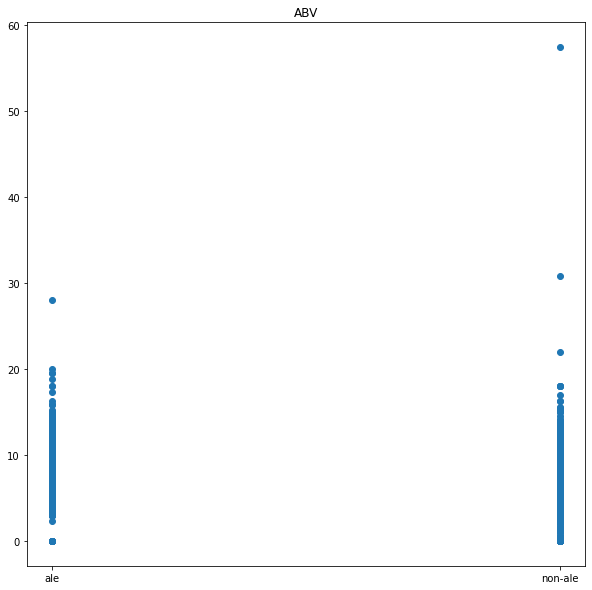

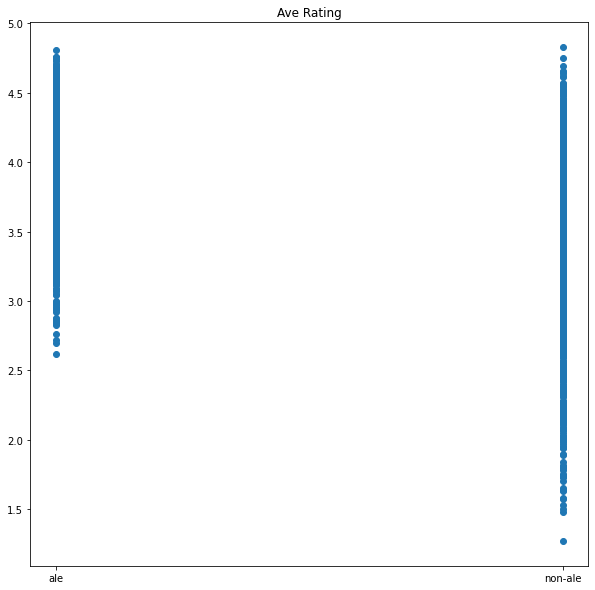

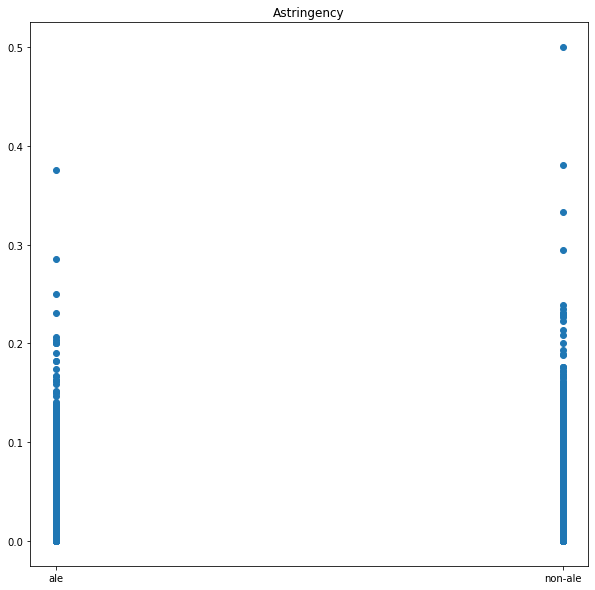

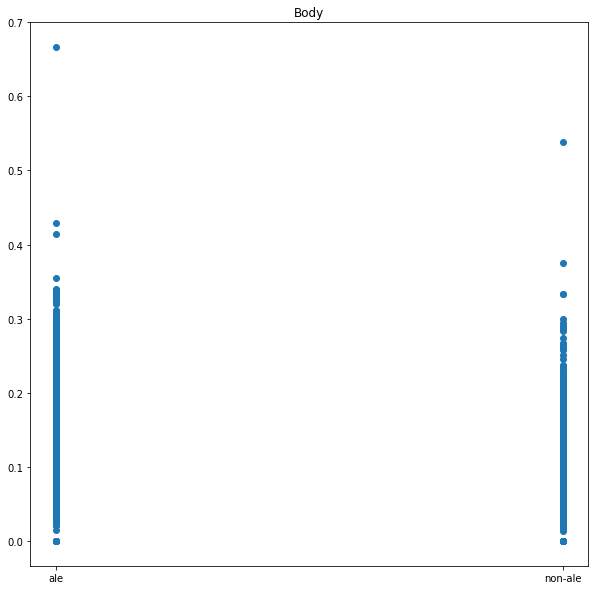

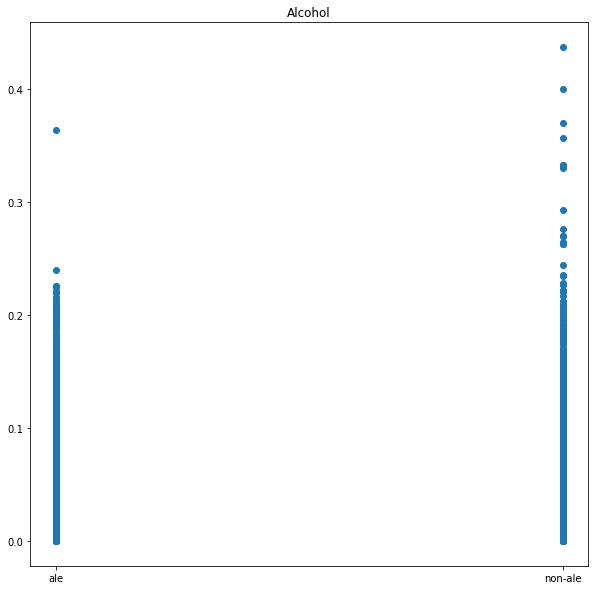

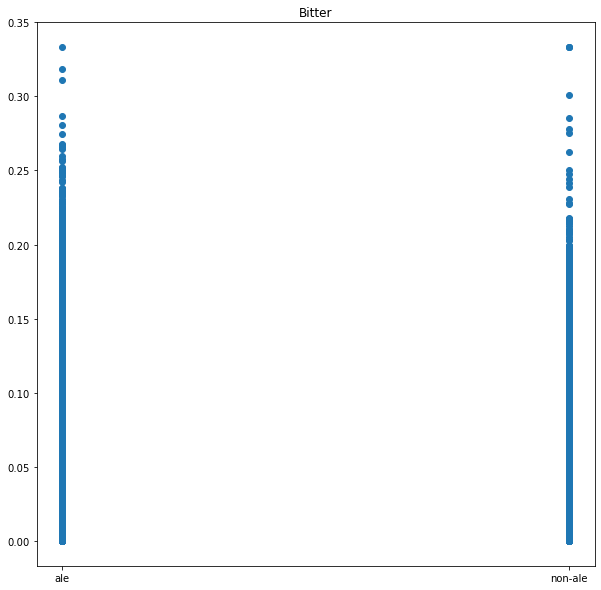

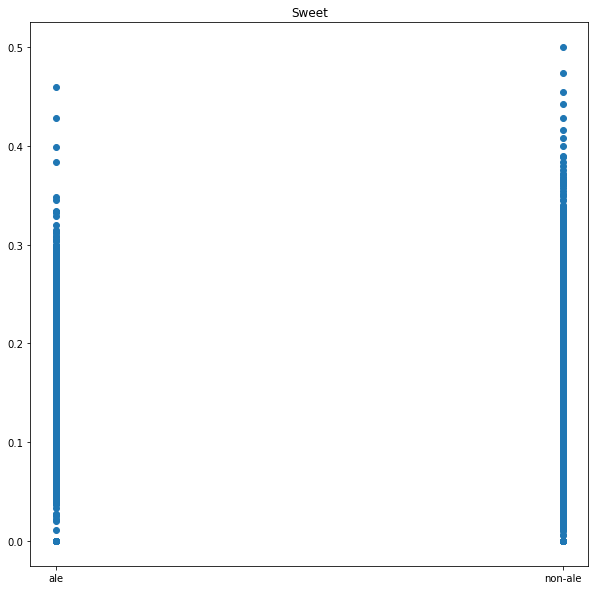

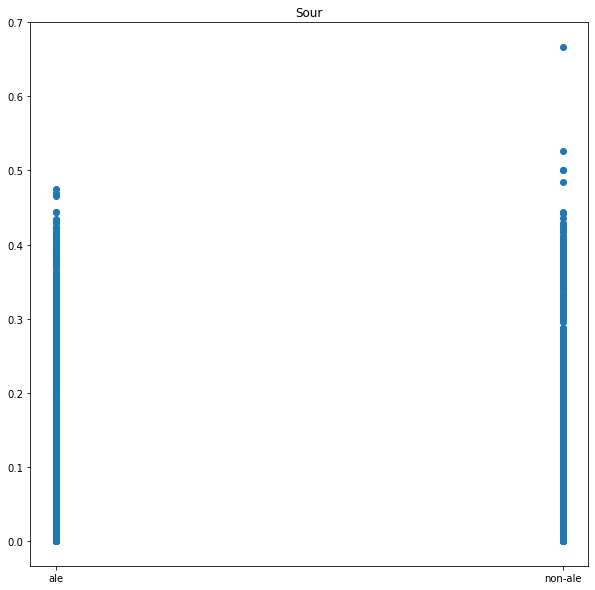

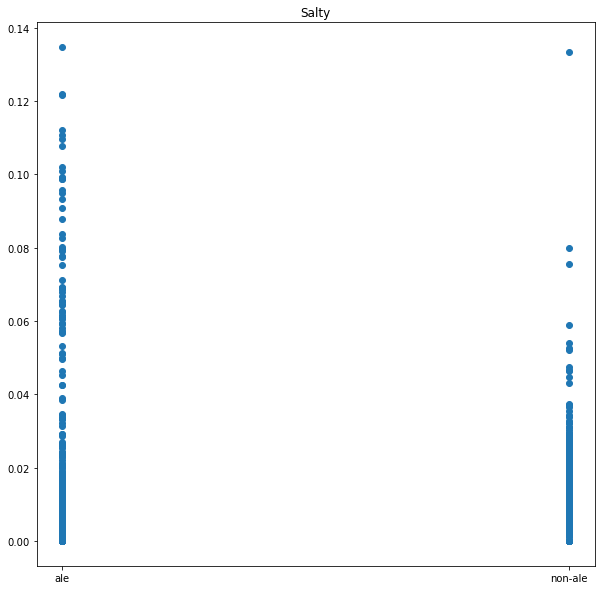

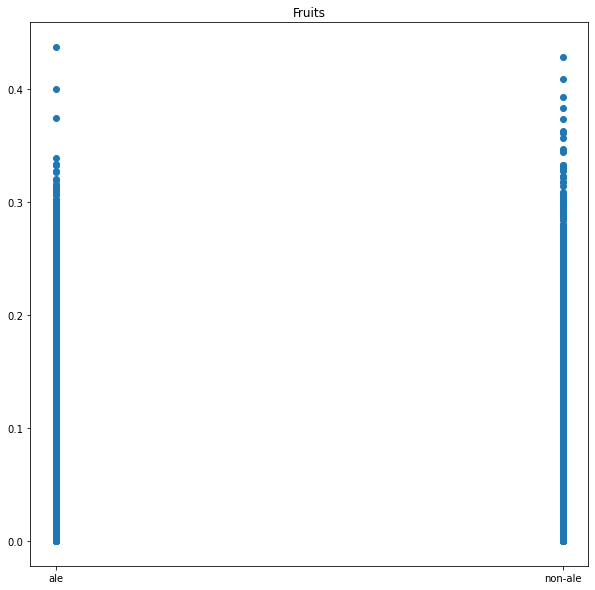

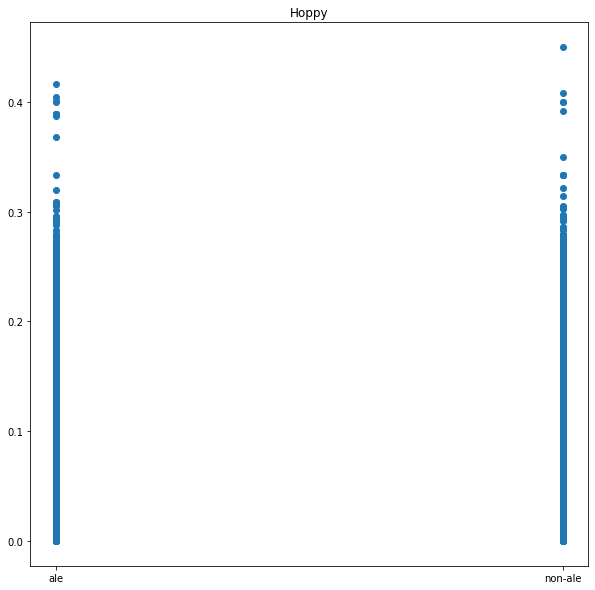

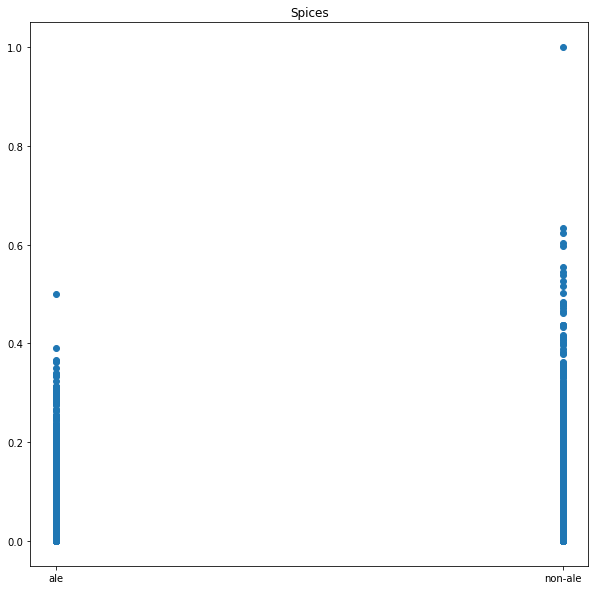

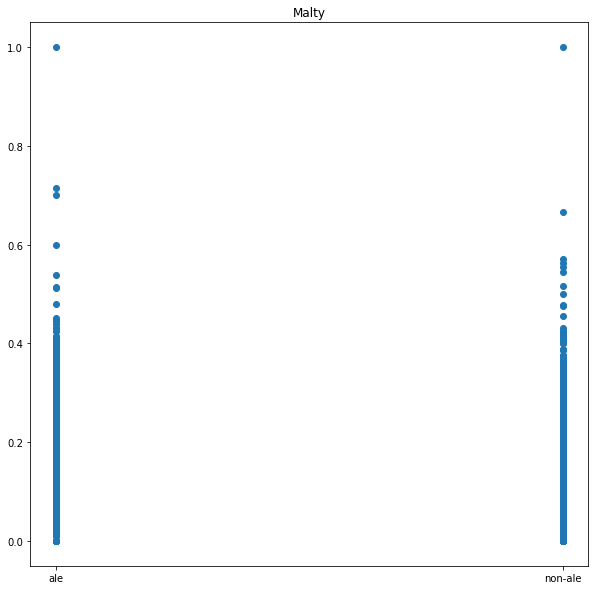

In [27]:
for col in beer_temp.drop("newStyle", axis=1).columns:
    plt.figure(figsize=(10,10))
    plt.scatter(beer_temp["newStyle"], beer_temp[col])
    plt.title(col)
    plt.show()

In [28]:
md = Model_define(beer_temp)
md.pscore()

KNN
-----------------------------------------------
train_score : 0.8375321336760926
val_score : 0.6954436450839329
Decision Tree
-----------------------------------------------
train_score : 1.0
val_score : 0.6882494004796164
Random Forest
-----------------------------------------------
train_score : 1.0
val_score : 0.7835731414868106
AdaBoost
-----------------------------------------------
train_score : 0.7647814910025706
val_score : 0.7326139088729017
Neural Net
-----------------------------------------------
train_score : 0.7347043701799486
val_score : 0.7260191846522782
Naive bayes
-----------------------------------------------
train_score : 0.7069408740359897
val_score : 0.7044364508393285
QDA
-----------------------------------------------
train_score : 0.7298200514138817
val_score : 0.7398081534772182


In [29]:
for col in beer_temp.drop(["newStyle", "Bitter"], axis=1).columns:
    print("Drop Column : Bitter, ", col)
    md = Model_define(beer_temp.drop(["Bitter", col], axis=1))
    md.nnscore()

Drop Column : Bitter,  ABV
Neural Net
-----------------------------------------------
train_score : 0.7375321336760925
val_score : 0.7254196642685852
Drop Column : Bitter,  Ave Rating
Neural Net
-----------------------------------------------
train_score : 0.7408740359897172
val_score : 0.738009592326139
Drop Column : Bitter,  Astringency
Neural Net
-----------------------------------------------
train_score : 0.7287917737789203
val_score : 0.7182254196642686
Drop Column : Bitter,  Body
Neural Net
-----------------------------------------------
train_score : 0.738560411311054
val_score : 0.7386091127098321
Drop Column : Bitter,  Alcohol
Neural Net
-----------------------------------------------
train_score : 0.7465295629820051
val_score : 0.7476019184652278
Drop Column : Bitter,  Sweet
Neural Net
-----------------------------------------------
train_score : 0.7408740359897172
val_score : 0.7170263788968825
Drop Column : Bitter,  Sour
Neural Net
-----------------------------------------

In [30]:
md = Model_define(beer_temp)
md.cv_nnscore()

cv_score : 0.7452442159383033
Kfold_cv_score : 0.7465295629820051
test_score : 0.7314148681055156
